In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt

In [3]:
filled = pd.read_csv('filled.csv').iloc[:, 1:]
features = pd.read_csv('features.csv').iloc[:, 1:]
features.shape

(16, 456)

In [4]:
corr_mat = features.corr('spearman')
top_vals = corr_mat > 0.75

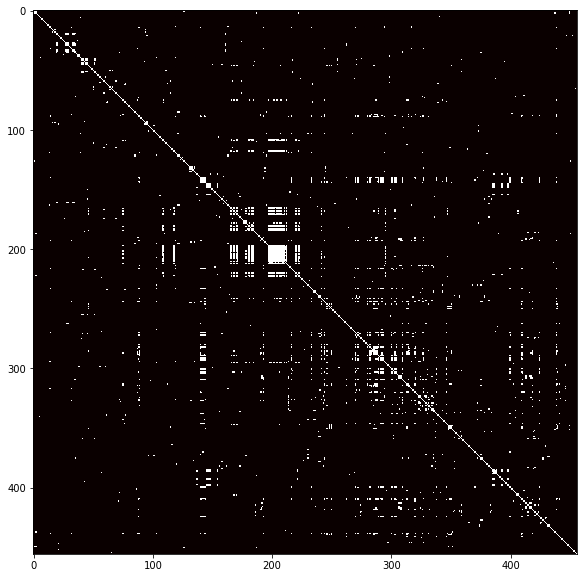

In [5]:
plt.figure(figsize=(10, 10))
plt.imshow(top_vals, cmap='hot', interpolation='none')

In [ ]:
# import numpy as np
# import scipy
# import scipy.cluster.hierarchy as sch

# X = features.corr().values
# d = sch.distance.pdist(X) 
# L = sch.linkage(d, method='average')
# ind = sch.fcluster(L, 0.5*d.max(), 'distance')
# columns = [features.columns.tolist()[i] for i in list((np.argsort(ind)))]
# df = features.corr().reindex(columns, axis=1)

# plt.figure(figsize=(10, 10))
# plt.imshow(df, cmap='RdYlGn', interpolation='none')

In [6]:
g = nx.Graph(corr_mat > 0.75)

In [7]:
cliqs = []

for idx, cliq in enumerate(nx.find_cliques(g)):
    if idx > 1000:
        break
    cliqs.append(cliq)
len(cliqs)

610

In [63]:
from arion.utils import generate_db

In [64]:
def peakset2ppm(peakset, filled):
    return [filled.loc[filled.peakIndex == int(vtx), :].peakPPM.mean() for vtx in peakset]

In [65]:
peak_db = generate_db()

found 7156 peaks across 514 metabolites


In [75]:
cliqs[6]

['37152',
 '38592',
 '37960',
 '38526',
 '36823',
 '38027',
 '38463',
 '38099',
 '37316',
 '37191',
 '37934',
 '38162',
 '38001',
 '37276',
 '38225',
 '38321',
 '38419',
 '38281',
 '38484',
 '31048',
 '39105']

In [97]:
a = peak_db.full_query(peakset2ppm(cliq, filled))

In [99]:
peakset2ppm(cliq, filled)

[3.726520625,
 3.3745787500000004,
 3.52912375,
 3.3906574999999997,
 3.8071443749999996,
 3.512740625,
 3.4059862500000007,
 3.494995625,
 3.6864356249999997,
 3.7171374999999998,
 3.53535,
 3.4797593750000004,
 3.519069375,
 3.6963387500000002,
 3.4643243750000003,
 3.440838666666667,
 3.416684375,
 3.4505687500000004,
 3.4008309090909097,
 5.21914625,
 3.24895125]

In [98]:
a

[[<Peak id:bmse000241_3.71561 metabolite_id:bmse000241 ppm:3.71561 amplitude:0.29694>,
  <Peak id:bmse000568_3.73416 metabolite_id:bmse000568 ppm:3.73416 amplitude:1.00000>,
  <Peak id:bmse000632_3.73515 metabolite_id:bmse000632 ppm:3.73515 amplitude:1.00000>],
 [<Peak id:bmse000287_3.37491 metabolite_id:bmse000287 ppm:3.37491 amplitude:0.13408>,
  <Peak id:bmse000732_3.37912 metabolite_id:bmse000732 ppm:3.37912 amplitude:0.16876>,
  <Peak id:bmse000779_3.37914 metabolite_id:bmse000779 ppm:3.37914 amplitude:0.17567>,
  <Peak id:bmse000388_3.37978 metabolite_id:bmse000388 ppm:3.37978 amplitude:0.54165>,
  <Peak id:bmse000379_3.38793 metabolite_id:bmse000379 ppm:3.38793 amplitude:0.69751>],
 [<Peak id:bmse000285_3.51693 metabolite_id:bmse000285 ppm:3.51693 amplitude:0.05520>,
  <Peak id:bmse000285_3.52207 metabolite_id:bmse000285 ppm:3.52207 amplitude:0.06803>,
  <Peak id:bmse000220_3.52269 metabolite_id:bmse000220 ppm:3.52269 amplitude:1.00000>,
  <Peak id:bmse000146_3.52269 metabolite_

In [96]:
peak_db.query(peakset2ppm(cliq, filled))

[{'metabolite_id': 'bmse000146', 'score': 3.5, 'overlap': 7},
 {'metabolite_id': 'bmse000241', 'score': 1.0, 'overlap': 2},
 {'metabolite_id': 'bmse000568', 'score': 1.0, 'overlap': 1},
 {'metabolite_id': 'bmse000632', 'score': 1.0, 'overlap': 1},
 {'metabolite_id': 'bmse000089', 'score': 1.0, 'overlap': 1},
 {'metabolite_id': 'bmse000426', 'score': 1.0, 'overlap': 1},
 {'metabolite_id': 'bmse000379', 'score': 0.8333333333333334, 'overlap': 5},
 {'metabolite_id': 'bmse000120', 'score': 0.8333333333333334, 'overlap': 5},
 {'metabolite_id': 'bmse000287', 'score': 0.8, 'overlap': 12},
 {'metabolite_id': 'bmse000206', 'score': 0.75, 'overlap': 3},
 {'metabolite_id': 'bmse000388', 'score': 0.6666666666666666, 'overlap': 4},
 {'metabolite_id': 'bmse000258', 'score': 0.6, 'overlap': 3},
 {'metabolite_id': 'bmse000220', 'score': 0.5714285714285714, 'overlap': 4},
 {'metabolite_id': 'bmse000732', 'score': 0.5555555555555556, 'overlap': 5},
 {'metabolite_id': 'bmse000285', 'score': 0.55555555555

In [91]:
[len(i) for i in a if len(i)]

[3, 5, 6, 14, 3, 11, 16, 5, 1, 6, 1, 11, 4, 7, 11, 7, 17, 6]

In [94]:
a

[[<Peak id:bmse000241_3.71561 metabolite_id:bmse000241 ppm:3.71561 amplitude:0.29694>,
  <Peak id:bmse000568_3.73416 metabolite_id:bmse000568 ppm:3.73416 amplitude:1.00000>,
  <Peak id:bmse000632_3.73515 metabolite_id:bmse000632 ppm:3.73515 amplitude:1.00000>],
 [<Peak id:bmse000287_3.37491 metabolite_id:bmse000287 ppm:3.37491 amplitude:0.13408>,
  <Peak id:bmse000732_3.37912 metabolite_id:bmse000732 ppm:3.37912 amplitude:0.16876>,
  <Peak id:bmse000779_3.37914 metabolite_id:bmse000779 ppm:3.37914 amplitude:0.17567>,
  <Peak id:bmse000388_3.37978 metabolite_id:bmse000388 ppm:3.37978 amplitude:0.54165>,
  <Peak id:bmse000379_3.38793 metabolite_id:bmse000379 ppm:3.38793 amplitude:0.69751>],
 [<Peak id:bmse000285_3.51693 metabolite_id:bmse000285 ppm:3.51693 amplitude:0.05520>,
  <Peak id:bmse000285_3.52207 metabolite_id:bmse000285 ppm:3.52207 amplitude:0.06803>,
  <Peak id:bmse000220_3.52269 metabolite_id:bmse000220 ppm:3.52269 amplitude:1.00000>,
  <Peak id:bmse000146_3.52269 metabolite_

In [79]:
def recr(a, p = [], d=0):
    if d == len(a):
        yield [pi.id for pi in p]
    else:
        for i in a[d]:
            if i not in p:
                yield from recr(a, p + [i], d+1)

In [92]:
b = recr([i for i in a if len(i)])

In [93]:
for z in b:
    print(list(z))

['bmse000568_3.73416', 'bmse000287_3.37491', 'bmse000285_3.51693', 'bmse000732_3.37912', 'bmse000774_3.80069', 'bmse000258_3.50069', 'bmse000732_3.39117', 'bmse000285_3.50586', 'bmse000241_3.71561', 'bmse000285_3.52207', 'bmse000287_3.49324', 'bmse000258_3.50924', 'bmse000287_3.45003', 'bmse000287_3.42903', 'bmse000732_3.40321', 'bmse000287_3.44025', 'bmse000379_3.38793', 'bmse000120_3.24052']
['bmse000568_3.73416', 'bmse000287_3.37491', 'bmse000285_3.51693', 'bmse000732_3.37912', 'bmse000774_3.80069', 'bmse000258_3.50069', 'bmse000732_3.39117', 'bmse000285_3.50586', 'bmse000241_3.71561', 'bmse000285_3.52207', 'bmse000287_3.49324', 'bmse000258_3.50924', 'bmse000287_3.45003', 'bmse000287_3.42903', 'bmse000732_3.40321', 'bmse000287_3.44025', 'bmse000379_3.38793', 'bmse000426_3.24973']
['bmse000568_3.73416', 'bmse000287_3.37491', 'bmse000285_3.51693', 'bmse000732_3.37912', 'bmse000774_3.80069', 'bmse000258_3.50069', 'bmse000732_3.39117', 'bmse000285_3.50586', 'bmse000241_3.71561', 'bmse00

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['bmse000568_3.73416', 'bmse000287_3.37491', 'bmse000285_3.51693', 'bmse000732_3.37912', 'bmse000774_3.80069', 'bmse000258_3.50069', 'bmse000732_3.39117', 'bmse000285_3.50586', 'bmse000241_3.71561', 'bmse000285_3.52207', 'bmse000287_3.49324', 'bmse000258_3.50924', 'bmse000779_3.45386', 'bmse000287_3.45003', 'bmse000120_3.42250', 'bmse000287_3.44025', 'bmse000732_3.41522', 'bmse000120_3.24052']
['bmse000568_3.73416', 'bmse000287_3.37491', 'bmse000285_3.51693', 'bmse000732_3.37912', 'bmse000774_3.80069', 'bmse000258_3.50069', 'bmse000732_3.39117', 'bmse000285_3.50586', 'bmse000241_3.71561', 'bmse000285_3.52207', 'bmse000287_3.49324', 'bmse000258_3.50924', 'bmse000779_3.45386', 'bmse000287_3.45003', 'bmse000120_3.42250', 'bmse000287_3.44025', 'bmse000732_3.41522', 'bmse000426_3.24973']
['bmse000568_3.73416', 'bmse000287_3.37491', 'bmse000285_3.51693', 'bmse000732_3.37912', 'bmse000774_3.80069', 'bmse000258_3.50069', 'bmse000732_3.39117', 'bmse000285_3.50586', 'bmse000241_3.71561', 'bmse0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['bmse000568_3.73416', 'bmse000287_3.37491', 'bmse000285_3.51693', 'bmse000732_3.37912', 'bmse000774_3.80069', 'bmse000258_3.50069', 'bmse000732_3.39117', 'bmse000285_3.50586', 'bmse000241_3.71561', 'bmse000285_3.52207', 'bmse000287_3.49324', 'bmse000258_3.50924', 'bmse000779_3.46396', 'bmse000425_3.44476', 'bmse000287_3.42903', 'bmse000287_3.45003', 'bmse000388_3.40157', 'bmse000069_3.25539']
['bmse000568_3.73416', 'bmse000287_3.37491', 'bmse000285_3.51693', 'bmse000732_3.37912', 'bmse000774_3.80069', 'bmse000258_3.50069', 'bmse000732_3.39117', 'bmse000285_3.50586', 'bmse000241_3.71561', 'bmse000285_3.52207', 'bmse000287_3.49324', 'bmse000258_3.50924', 'bmse000779_3.46396', 'bmse000425_3.44476', 'bmse000287_3.42903', 'bmse000287_3.45003', 'bmse000388_3.40157', 'bmse000380_3.25965']
['bmse000568_3.73416', 'bmse000287_3.37491', 'bmse000285_3.51693', 'bmse000732_3.37912', 'bmse000774_3.80069', 'bmse000258_3.50069', 'bmse000732_3.39117', 'bmse000285_3.50586', 'bmse000241_3.71561', 'bmse0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['bmse000568_3.73416', 'bmse000287_3.37491', 'bmse000285_3.51693', 'bmse000732_3.37912', 'bmse000774_3.80069', 'bmse000258_3.50069', 'bmse000732_3.39117', 'bmse000285_3.50586', 'bmse000241_3.71561', 'bmse000285_3.52207', 'bmse000287_3.49324', 'bmse000380_3.50925', 'bmse000779_3.45386', 'bmse000779_3.44376', 'bmse000146_3.40675', 'bmse000287_3.44025', 'bmse000732_3.41522', 'bmse000120_3.25164']
['bmse000568_3.73416', 'bmse000287_3.37491', 'bmse000285_3.51693', 'bmse000732_3.37912', 'bmse000774_3.80069', 'bmse000258_3.50069', 'bmse000732_3.39117', 'bmse000285_3.50586', 'bmse000241_3.71561', 'bmse000285_3.52207', 'bmse000287_3.49324', 'bmse000380_3.50925', 'bmse000779_3.45386', 'bmse000779_3.44376', 'bmse000146_3.40675', 'bmse000287_3.44025', 'bmse000732_3.41522', 'bmse000069_3.25539']
['bmse000568_3.73416', 'bmse000287_3.37491', 'bmse000285_3.51693', 'bmse000732_3.37912', 'bmse000774_3.80069', 'bmse000258_3.50069', 'bmse000732_3.39117', 'bmse000285_3.50586', 'bmse000241_3.71561', 'bmse00

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



KeyboardInterrupt: 

In [17]:
cliq = cliqs[5]
result_set = peak_db.query(peakset2ppm(cliq, filled))
for res in result_set:
    print(res, peak_db.metabolite_peak_size[res['metabolite_id']])

{'metabolite_id': 'bmse000826', 'score': 1.0, 'overlap': 1} 1
{'metabolite_id': 'bmse000373', 'score': 0.07692307692307693, 'overlap': 1} 13
{'metabolite_id': 'bmse000383', 'score': 0.07692307692307693, 'overlap': 1} 13
{'metabolite_id': 'bmse000001', 'score': 0.0625, 'overlap': 1} 16
{'metabolite_id': 'bmse000038', 'score': 0.045454545454545456, 'overlap': 1} 22
{'metabolite_id': 'bmse000382', 'score': 0.038461538461538464, 'overlap': 1} 26
{'metabolite_id': 'bmse000040', 'score': 0.038461538461538464, 'overlap': 1} 26
{'metabolite_id': 'bmse000376', 'score': 0.037037037037037035, 'overlap': 1} 27
{'metabolite_id': 'bmse000794', 'score': 0.037037037037037035, 'overlap': 1} 27
{'metabolite_id': 'bmse000291', 'score': 0.03571428571428571, 'overlap': 1} 28
{'metabolite_id': 'bmse000299', 'score': 0.030303030303030304, 'overlap': 1} 33
{'metabolite_id': 'bmse000037', 'score': 0.02702702702702703, 'overlap': 1} 37
{'metabolite_id': 'bmse000913', 'score': 0.02702702702702703, 'overlap': 1} 

In [ ]:
# found = False
# identified_metabolites = []
# for idx, cliq in enumerate(cliqs):
#     res = peak_db.query(peakset2ppm(cliq, filled))
#     print(res)
#     for qs in res:
#         if qs[1] >= 0.5 and peak_sizes[qs[0]] > 1:
#             identified_metabolites.append((idx, cliq, qs))

In [202]:
unique_metabolites = {i[2][0] for i in identified_metabolites}
print(f'identified {len(unique_metabolites)} potential metabolites')
unique_metabolites

identified 1 potential metabolites


{'bmse000107'}

In [209]:
met_uid = 'bmse000187'
pd.read_csv(f'{data_dir}/{met_uid}/{peak_file}')

PPM  Amp
0  5.78563    1
1  5.79833    1
2  7.52020    1
3  7.53290    1

In [63]:
filled[np.logical_and(filled.peakPPM > 3.09, filled.peakPPM < 3.10)]

peakIndex  peakPPM    peakValue    peakSNR  peakScale  Sample
2932      39724  3.09768  1645.851751  78.810757       16.0       1
2933      39724  3.09768  1668.194836  16.073119       16.0       2
2934      39724  3.09768  1353.187492  27.515097       16.0       4
2935      39724  3.09768  1442.829691  21.724018       16.0       5
2936      39724  3.09792   799.588237  13.440489       16.0       6
2937      39724  3.09768  1048.566347  25.428368       16.0       7
2938      39724  3.09792  1099.928058  41.239464       15.0       8
2939      39724  3.09792  2318.607778  36.745645       16.0       9
2940      39724  3.09792  1144.814369  29.424182       16.0      10
2941      39724  3.09792  1526.418191  25.952690       16.0      11
2942      39724  3.09792   513.722321   6.265792       16.0      12
2943      39724  3.09768   471.015684   4.189935       16.0      13
2944      39724  3.09768   766.707041  14.130957       16.0      14
2945      39724  3.09792   653.553693   5.377113       16.0      15
6587      39724  3.09780  1368.159583        NaN       15.5       3
6588      39724  3.09780   573.749336        NaN       14.5      16

In [160]:
# associate cliques to samples
for peak in cliqs[170]:
    print(set(filled.loc[filled.peakIndex == int(peak), :].Sample))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}
